### Exercise 1

In [7]:
from qiskit import *

oracle = QuantumCircuit(3, name="oracle")
oracle.x(1)
oracle.ccz(0, 1, 2)
oracle.x(1)

oracle.draw()


q_0: ──────■──────
     ┌───┐ │ ┌───┐
q_1: ┤ X ├─■─┤ X ├
     └───┘ │ └───┘
q_2: ──────■──────

In [8]:
from qiskit.quantum_info import Statevector

state = Statevector.from_int(5, 2**3)
state = state.evolve(oracle)
state.draw("latex")


<IPython.core.display.Latex object>

In [9]:
diffuser = QuantumCircuit(3, name="diffuser")
diffuser.h([0, 1, 2])
diffuser.x([0, 1, 2])
diffuser.barrier()
diffuser.h(2)
diffuser.ccx(0, 1, 2)
diffuser.h(2)
diffuser.barrier()
diffuser.x([0, 1, 2])
diffuser.h([0, 1, 2])
diffuser.draw()


┌───┐┌───┐ ░                 ░ ┌───┐┌───┐
q_0: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░        │        ░ ├───┤├───┤
q_1: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤├───┤
q_2: ┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├
     └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘

In [10]:
grover = QuantumCircuit(3, 3)
grover.h([0, 1, 2])
grover.append(oracle, [0, 1, 2])
grover.append(diffuser, [0, 1, 2])
grover.measure([0, 1, 2], [0, 1, 2])

grover.draw()


┌───┐┌─────────┐┌───────────┐┌─┐      
q_0: ┤ H ├┤0        ├┤0          ├┤M├──────
     ├───┤│         ││           │└╥┘┌─┐   
q_1: ┤ H ├┤1 oracle ├┤1 diffuser ├─╫─┤M├───
     ├───┤│         ││           │ ║ └╥┘┌─┐
q_2: ┤ H ├┤2        ├┤2          ├─╫──╫─┤M├
     └───┘└─────────┘└───────────┘ ║  ║ └╥┘
c: 3/══════════════════════════════╩══╩══╩═
                                   0  1  2

In [11]:
import math

num_iterations = math.pi * math.sqrt(8) / 4
print(num_iterations)


2.221441469079183


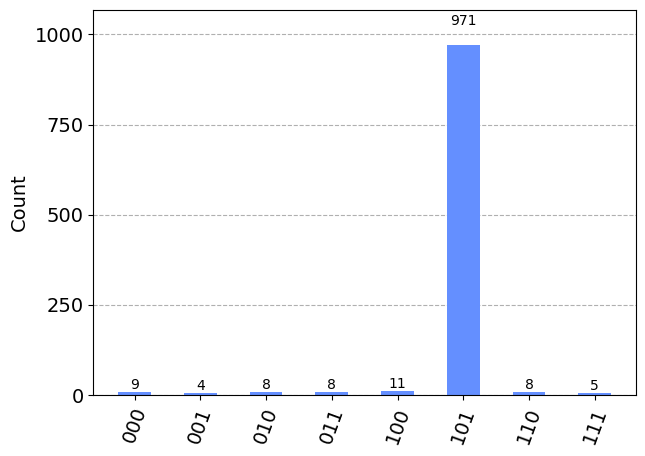

In [12]:
from qiskit.visualization import plot_histogram

grover = QuantumCircuit(3, 3)
grover.h([0, 1, 2])

for i in range(2):
    grover.append(oracle, [0, 1, 2])
    grover.append(diffuser, [0, 1, 2])

grover.measure([0, 1, 2], [0, 1, 2])

backend = Aer.get_backend("qasm_simulator")
job = execute(grover, backend, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)


### Exercise 2

In [63]:
from qiskit.circuit.library import MCMT

oracle = QuantumCircuit(4, name="oracle")
oracle.x(1)
oracle.x(2)
# oracle.mcp(math.pi / 2, [0, 1, 2], 3)
mcz = MCMT("cz", 3, 1)
oracle.compose(mcz, [0, 1, 2, 3], inplace=True)
oracle.x(1)
oracle.x(2)

oracle.draw()


q_0: ──────■──────
     ┌───┐ │ ┌───┐
q_1: ┤ X ├─■─┤ X ├
     ├───┤ │ ├───┤
q_2: ┤ X ├─■─┤ X ├
     └───┘ │ └───┘
q_3: ──────■──────

In [44]:
diffuser = QuantumCircuit(4, name="diffuser")
diffuser.h([0, 1, 2, 3])
diffuser.x([0, 1, 2, 3])
diffuser.barrier()
diffuser.h(3)
diffuser.mcx([0, 1, 2], 3)
diffuser.h(3)
diffuser.barrier()
diffuser.x([0, 1, 2, 3])
diffuser.h([0, 1, 2, 3])
diffuser.draw()


┌───┐┌───┐ ░                 ░ ┌───┐┌───┐
q_0: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░        │        ░ ├───┤├───┤
q_1: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░        │        ░ ├───┤├───┤
q_2: ┤ H ├┤ X ├─░────────■────────░─┤ X ├┤ H ├
     ├───┤├───┤ ░ ┌───┐┌─┴─┐┌───┐ ░ ├───┤├───┤
q_3: ┤ H ├┤ X ├─░─┤ H ├┤ X ├┤ H ├─░─┤ X ├┤ H ├
     └───┘└───┘ ░ └───┘└───┘└───┘ ░ └───┘└───┘

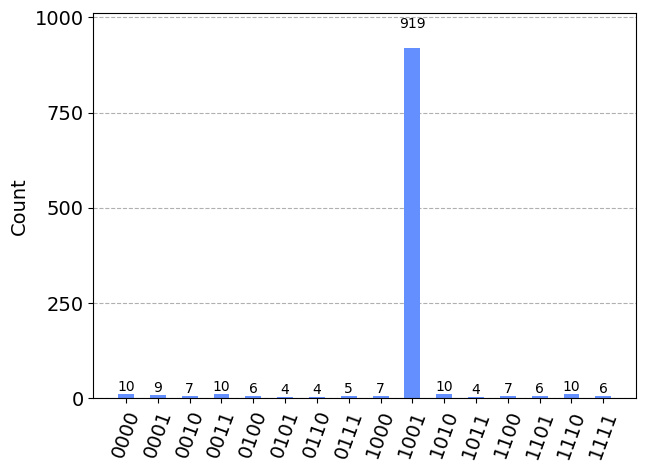

In [65]:
from qiskit.visualization import plot_histogram

grover = QuantumCircuit(4, 4)
grover.h([0, 1, 2, 3])

for i in range(2):
    grover.append(oracle, [0, 1, 2, 3])
    grover.append(diffuser, [0, 1, 2, 3])

grover.measure([0, 1, 2, 3], [0, 1, 2, 3])

backend = Aer.get_backend("qasm_simulator")
job = execute(grover, backend, shots=1024)
counts = job.result().get_counts()
plot_histogram(counts)
